# GANs Image Generation

In this notebook, we will explore how Generative Adversarial Networks (GANs) generate images. We will use a pretrained GAN model (BigGAN) to generate images from random noise.

## Instructions
1. Run the code below to generate an image from random noise.
2. Modify the latent vector to generate different images.
3. Experiment with generating different images by altering the latent vector and visualizing the results.


In [18]:
%pip install pytorch-pretrained-biggan


Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mariyahjamali/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


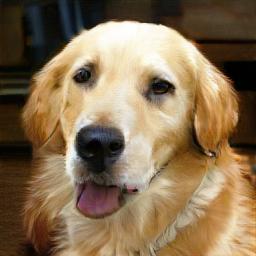

In [19]:
import torch
from pytorch_pretrained_biggan import BigGAN, one_hot_from_names, truncated_noise_sample
from PIL import Image
import numpy as np
import nltk

# Download required NLTK resource
nltk.download('wordnet')

# Load pretrained BigGAN model
model = BigGAN.from_pretrained('biggan-deep-256')
model.eval()

# Generate random latent vector (noise)
latent_vector = truncated_noise_sample(truncation=0.4, batch_size=1)  # 128-dim noise
latent_vector = torch.from_numpy(latent_vector)

# Generate one-hot class vector (e.g., golden retriever, ImageNet class)
class_vector = one_hot_from_names(['golden retriever'], batch_size=1)
class_vector = torch.from_numpy(class_vector)

# Generate image
with torch.no_grad():
    generated_image = model(latent_vector, class_vector, 0.4)

# Convert the tensor to a displayable image
generated_image = generated_image.squeeze().permute(1, 2, 0).cpu().numpy()
generated_image = ((generated_image + 1) / 2 * 255).astype('uint8')  # [-1, 1] → [0, 255]
Image.fromarray(generated_image)



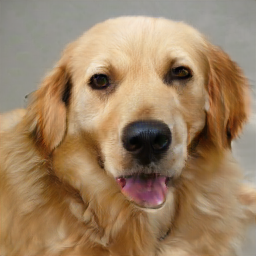

In [20]:
# Generate slightly modified latent vector
latent_vector = truncated_noise_sample(truncation=0.4, batch_size=1)
latent_vector = latent_vector + 0.2
latent_vector = torch.from_numpy(latent_vector)

# Generate image
with torch.no_grad():
    generated_image = model(latent_vector, class_vector, 0.4)

generated_image = generated_image.squeeze().permute(1, 2, 0).cpu().numpy()
generated_image = ((generated_image + 1) / 2 * 255).astype('uint8')
Image.fromarray(generated_image)


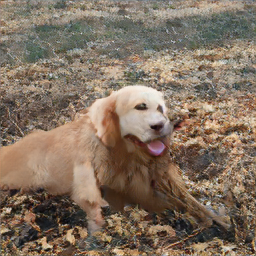

In [21]:
# Generate entirely new random latent vector
latent_vector = truncated_noise_sample(truncation=0.8, batch_size=1)
latent_vector = torch.from_numpy(latent_vector)

# Generate image
with torch.no_grad():
    generated_image = model(latent_vector, class_vector, 0.8)

generated_image = generated_image.squeeze().permute(1, 2, 0).cpu().numpy()
generated_image = ((generated_image + 1) / 2 * 255).astype('uint8')
Image.fromarray(generated_image)


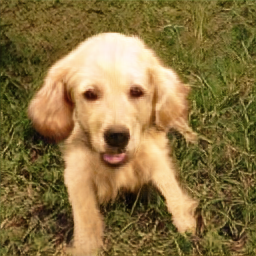

In [23]:
# Experiment with different latent vectors
# New random latent vector with different truncation
latent_vector = truncated_noise_sample(truncation=0.9, batch_size=1)
latent_vector = torch.from_numpy(latent_vector)

with torch.no_grad():
    generated_image = model(latent_vector, class_vector, 0.9)

generated_image = generated_image.squeeze().permute(1, 2, 0).cpu().numpy()
generated_image = ((generated_image + 1) / 2 * 255).astype('uint8')
Image.fromarray(generated_image)


## Reflection

Now that you have generated images, write a brief report reflecting on your observations:

1. How did the generated images change when you modified the latent vector?

Changes in the latent vector led to the generation of an entirely new image every time. The class of the image, golden retriver, stayed the same but there was a new background and new textures every time.

2. What patterns did you notice in the generated images? Were they realistic?

I noticed that the generated images all at least included the dogs face with the ears, nose, eyes, and tongue. All the images were slightly blurry and had different depictions of different features. The eyes in all the pictures were almost creepy, human like eyes, and generally unfitting for a dog.

3. How does the process of generating images from noise differ from traditional image generation methods?

Traditional image generation methods relies on rules or structured data, while GANs use learned distributions to generate images from pure noise. GANs mimic patterns from real datasets by training a generator and discriminator adversarially. This makes them more sensitive to training data and architecture.

4. What challenges or limitations did you observe with the GAN model?

There's limited variation in the images. It is hard to specify features or how the dog is depicted and hard to control what the background is or how textured or zoomed in the image is. The images can also look unrealistic when there's inconsitent (different color furs or lighting) or overlapping features (misplaced eyes).